# Metodología de la Simulación

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo

Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire.

1. Analíticamente.
2. Mediante simulación.

Analiticamente:

Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

In [ ]:
x = [] # Numero de caras o soles

**PASO 2**. Formule la distribución de probabilidad de cada variable.


|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)|       0.5  |0.5          |

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)  |  0.5     | 0.5         |
|F(x)  |   0.5    |  1        |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|           |**Sol**|**Aguila**|
|-----------|-------|----------|
|f(x)       |   0.5    |   0.5       |
|F(x)       |    0.5   |     1     |
|Intervalos |    [0,0.5)   |  [0.5,1]        |

**PASO 5**. Genere números aleatorios.

In [ ]:
import numpy as np

n = 3
aleatorios = np.random.uniform(0, 1, n)
x = aleatorios

**PASO 6**. Simule un lanzamiento.

Si Número de caras = 2       

¿Aparecen dos caras? = **1**

Si Número de caras ≠ 2       

¿Aparecen dos caras? = **0**

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [20]:
def volados(n):
    caras = 0
    for i in range(n):
        u = random.uniform(0,1)
        if u <= 0.5:
            caras += 1
    return caras

In [21]:
def caras(m):
    favorable = 0
    if volados(3) == m:
        favorable +=1
    return favorable

In [52]:
def experimento(iteraciones):
    i = 0
    favorables=0
    Lista = []
    while i <= iteraciones:
        favorables = favorables + caras(2)
        i += 1
        probabilidad = favorables/i
        Lista.append(probabilidad)

    return Lista

In [36]:
caras(2)

0

In [53]:
from typing import List
exp = experimento(2000)
#print(exp[:10])


In [54]:
np.mean(exp)

0.35926663098678574

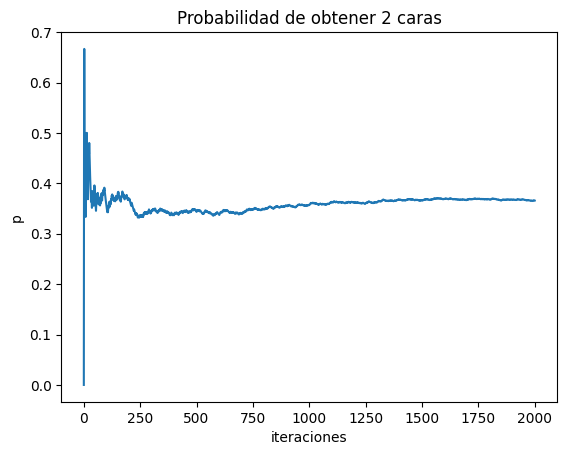

In [55]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad de obtener 2 caras')
plt.show()

**PASO 8**. Replique el modelo.

In [65]:
def simulacion_caras(repeticiones):
    List = []
    for i in range(repeticiones):
        List.append(np.mean(experimento(1000)))
    return List

In [76]:
simulacion = simulacion_caras(50)


[0.39939954098855057, 0.37107091431355577, 0.33803527131117644, 0.38339993524176214, 0.4075822700807374, 0.343215706899859, 0.36453360721504846, 0.3788535536819362, 0.3585771375584003, 0.42717273415266, 0.34663281107371596, 0.33179266514134853, 0.37035231505793265, 0.36378551362147477, 0.3747346496654375, 0.3874662558171193, 0.38479222384583345, 0.4136567204374704, 0.41177989571571205, 0.39583900571605446, 0.3821465859220813, 0.36110025942068286, 0.3597638047944106, 0.3701869383995976, 0.3826614662748554, 0.38377426515333235, 0.37679700660780024, 0.4032812258969759, 0.3566204240688974, 0.3623567734683437, 0.3799317121953169, 0.35657895088456665, 0.3529361611876722, 0.38622148278946977, 0.37180016218710277, 0.3548103825511511, 0.43848904263191096, 0.39406985132785355, 0.35638840445998304, 0.4212444561864094, 0.39560816885699746, 0.3706133242144835, 0.34034931768766286, 0.35817404402728115, 0.3928403621431038, 0.36838025740086805, 0.3416346042967256, 0.4192059492886777, 0.392334353120706

[0.33803527131117644, 0.33179266514134853, 0.34034931768766286, 0.3416346042967256]


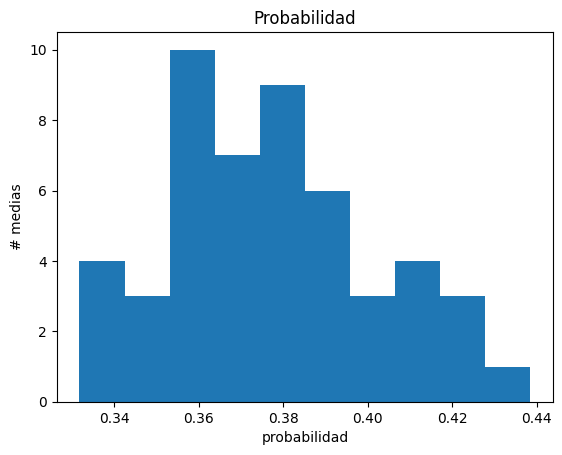

In [85]:
print([num for num in simulacion if num <=0.343])
plt.hist(simulacion)
plt.xlabel('probabilidad')
plt.ylabel('# medias')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire y su desviación
estándar.

In [91]:
np.mean(simulacion), np.var(simulacion), np.std(simulacion)

(0.3778551191686211, 0.0006051411988390256, 0.024599617859613704)

In [90]:
print(np.sqrt(np.var(simulacion)))

0.024599617859613704


In [92]:
import numpy as np
import scipy.stats as stats

datos = np.array(simulacion)
nivel_confianza = 0.95
media_muestral = np.mean(simulacion)
desviacion = np.std(simulacion)
tamaño_muestra = len(datos)

# Codigo con valor critico

valor_critico = stats.norm.ppf((1 + nivel_confianza)/2)
intervalo_inf = media_muestral - (valor_critico)*(desviacion/np.sqrt(tamaño_muestra))
intervalo_sup = media_muestral + (valor_critico)*(desviacion/np.sqrt(tamaño_muestra))
print("\nIntervalo inferior: ",intervalo_inf)
print("\nIntervalo superior: ",intervalo_sup)



Intervalo inferior:  0.3710365782747852

Intervalo superior:  0.38467366006245696


In [95]:
# Codigo corto

intervalo_confianza = stats.t.interval(nivel_confianza, tamaño_muestra-1, loc=media_muestral, scale=stats.sem(datos))
print("Intervalo de confianza: ", intervalo_confianza)

Intervalo de confianza:  (0.37079300733596704, 0.3849172310012751)
